In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
)
import glob
import re
import csv

In [18]:
output_files = glob.glob("output/imagenet21k*.txt")
print(output_files)

model_name = output_files[0].partition("_skin")[0]
csv_file_name = model_name + "_metrics.csv"

hyper_params = [
    "vit",
    "tokenizer",
    "integrate_way",
    "optimizer",
    "batch_size",
    # "epochs",
    # "max_stop_count",
    # "grad_norm_clip",
    "learning_rate",
    "scheduler",
    # "weight_decay",
]

pattern_true = r"binary skin tone (\d+) true .*:\[(.*?)\]"
pattern_predict = r"binary skin tone (\d+) predicted .*:\[(.*?)\]"
# pattern_true = r"^skin tone (\d+) true .*:\[(.*?)\]"
# pattern_predict = r"^skin tone (\d+) predicted .*:\[(.*?)\]"

pattern_loss = r"validation loss\s*=\s*\[(.*?)\]"

header = [
    "Hyper Parameters",
]

metric_types = [
    "Accuracy",
    "Sensitivity",
    "Specificity",
    "Precision",
    "Score",
    "AUC",
]


for i in range(1, 3):
    for metric in metric_types:
        header.append(f"Skin{i} {metric}")


# for i in range(1, 7):
#     for metric in metric_types:
#         header.append(f"Skin{i} {metric}")

print(header)
print(model_name)

with open(csv_file_name, "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(header)

['output\\imagenet21k_ViT-B_32_skin_Adam_fixed_0.001_output.txt', 'output\\imagenet21k_ViT-B_32_skin_SGD_CosineAnnealingLR_0.001_output.txt', 'output\\imagenet21k_ViT-B_32_skin_SGD_fixed_0.001_output.txt']
['Hyper Parameters', 'Skin1 Accuracy', 'Skin1 Sensitivity', 'Skin1 Specificity', 'Skin1 Precision', 'Skin1 Score', 'Skin1 AUC', 'Skin2 Accuracy', 'Skin2 Sensitivity', 'Skin2 Specificity', 'Skin2 Precision', 'Skin2 Score', 'Skin2 AUC']
output\imagenet21k_ViT-B_32


batch_size = 512
optimizer = Adam
learning_rate = 0.001
scheduler = fixed


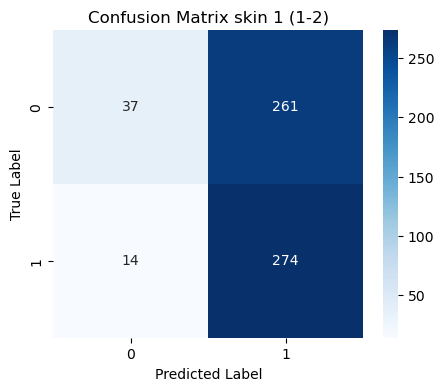

Accuracy: 0.5307
Sensitivity: 0.9514
Specificity: 0.1242
Precision: 0.5121
F1 Score: 0.6659
AUC: 0.5378


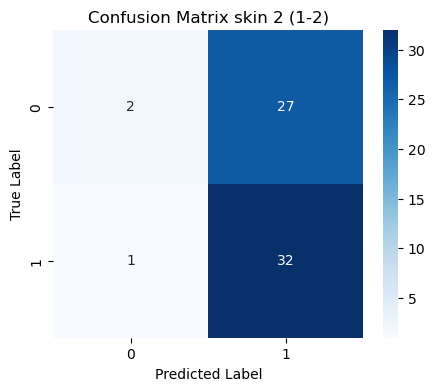

Accuracy: 0.5484
Sensitivity: 0.9697
Specificity: 0.0690
Precision: 0.5424
F1 Score: 0.6957
AUC: 0.5193
['batch_size = 512  optimizer = Adam  learning_rate = 0.001  scheduler = fixed  ', ' 0.5307', ' 0.9514', ' 0.1242', ' 0.5121', ' 0.6659', ' 0.5378', ' 0.5484', ' 0.9697', ' 0.0690', ' 0.5424', ' 0.6957', ' 0.5193']
batch_size = 512
optimizer = SGD
learning_rate = 0.001
scheduler = CosineAnnealingLR


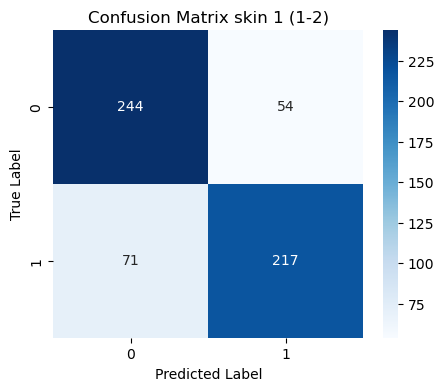

Accuracy: 0.7867
Sensitivity: 0.7535
Specificity: 0.8188
Precision: 0.8007
F1 Score: 0.7764
AUC: 0.7861


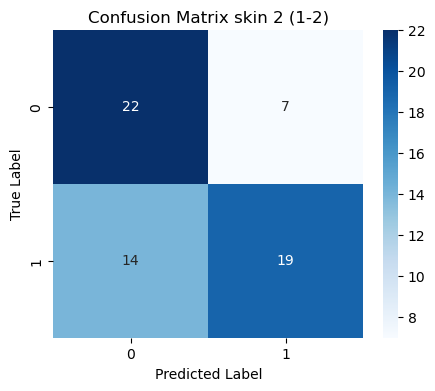

Accuracy: 0.6613
Sensitivity: 0.5758
Specificity: 0.7586
Precision: 0.7308
F1 Score: 0.6441
AUC: 0.6672
['batch_size = 512  optimizer = SGD  learning_rate = 0.001  scheduler = CosineAnnealingLR  ', ' 0.7867', ' 0.7535', ' 0.8188', ' 0.8007', ' 0.7764', ' 0.7861', ' 0.6613', ' 0.5758', ' 0.7586', ' 0.7308', ' 0.6441', ' 0.6672']
batch_size = 512
optimizer = SGD
learning_rate = 0.001
scheduler = fixed


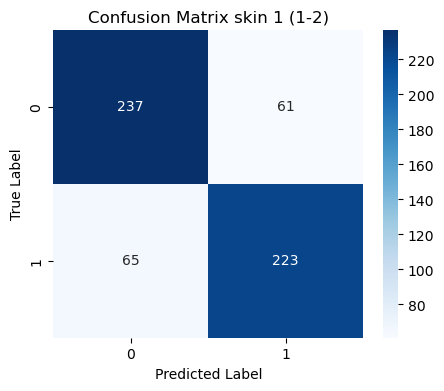

Accuracy: 0.7850
Sensitivity: 0.7743
Specificity: 0.7953
Precision: 0.7852
F1 Score: 0.7797
AUC: 0.7848


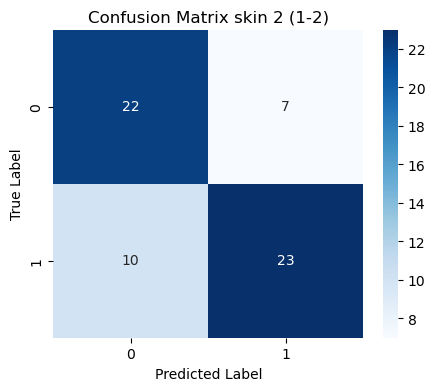

Accuracy: 0.7258
Sensitivity: 0.6970
Specificity: 0.7586
Precision: 0.7667
F1 Score: 0.7302
AUC: 0.7278
['batch_size = 512  optimizer = SGD  learning_rate = 0.001  scheduler = fixed  ', ' 0.7850', ' 0.7743', ' 0.7953', ' 0.7852', ' 0.7797', ' 0.7848', ' 0.7258', ' 0.6970', ' 0.7586', ' 0.7667', ' 0.7302', ' 0.7278']


In [19]:
for file_name in output_files:
    skin_tone = -1
    true_labels = None
    predicted_labels = None

    with open(file_name, "r") as file:
        content = file.read()

    sections = [
        section.strip() for section in content.split("Test output:") if section.strip()
    ]

    for section in sections:
        params = ""
        metrics = []
        for line in section.split("\n"):
            if any(keyword in line for keyword in hyper_params):
                print(line.strip())
                params += line.strip() + "\n"

            match_true = re.search(pattern_true, line)
            if match_true:
                skin_tone = int(match_true.group(1))
                true_labels = list(map(int, match_true.group(2).split(", ")))

            match_predicted = re.search(pattern_predict, line)
            if match_predicted:
                skin_tone = int(match_predicted.group(1))
                predicted_labels = list(map(int, match_predicted.group(2).split(", ")))

            match_loss = re.search(pattern_loss, line)
            if match_loss:
                loss_list = match_loss.group(1).split(", ")
                loss_values = list(map(float, loss_list))
                epochs = list(range(1, len(loss_values) + 1))

                # Plot loss curve
                plt.figure(figsize=(6, 4))
                plt.plot(epochs, loss_values, marker="o", linestyle="-", label="Loss")
                plt.xlabel("Epoch")
                plt.ylabel("Loss")
                plt.title("Model Loss per Epoch")
                plt.legend()
                plt.show()
                match_loss = None

            if true_labels and predicted_labels:
                cm = confusion_matrix(true_labels, predicted_labels)
                plt.figure(figsize=(5, 4))
                sns.heatmap(
                    cm,
                    annot=True,
                    fmt="d",
                    cmap="Blues",
                    xticklabels=[0, 1],
                    yticklabels=[0, 1],
                )
                plt.xlabel("Predicted Label")
                plt.ylabel("True Label")
                if line.startswith("binary"):
                    plt.title(f"Confusion Matrix skin {skin_tone} (1-2)")
                else:
                    plt.title(f"Confusion Matrix skin  {skin_tone} (1-6)")
                plt.show()

                tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()

                # Metrics calculation
                accuracy = accuracy_score(true_labels, predicted_labels)
                sensitivity = recall_score(
                    true_labels, predicted_labels
                )  # Same as recall
                specificity = tn / (tn + fp)  # True Negative Rate
                precision = precision_score(true_labels, predicted_labels)
                f1 = f1_score(true_labels, predicted_labels)
                auc = roc_auc_score(true_labels, predicted_labels)

                metric = ""
                # Print results
                # if line.startswith("binary"):
                #     metric += f"Skin {skin_tone} (1-2)\n"
                # else:
                #     metric += f"Skin {skin_tone} (1-6)\n"
                metric += f"Accuracy: {accuracy:.4f}\n"
                metric += f"Sensitivity: {sensitivity:.4f}\n"
                metric += f"Specificity: {specificity:.4f}\n"
                metric += f"Precision: {precision:.4f}\n"
                metric += f"F1 Score: {f1:.4f}\n"
                metric += f"AUC: {auc:.4f}"
                print(metric)
                metrics.append(metric)
                true_labels = None
                predicted_labels = None

        params = params.replace("\n", "  ")
        metrics.insert(0, params)
        metrics = [line for metric in metrics for line in metric.split("\n")]
        metrics = [
            metric.split(":")[1] if ":" in metric else metric for metric in metrics
        ]
        print(metrics)
        with open(csv_file_name, "a", newline="") as file:
            writer = csv.writer(file)
            writer.writerow(metrics)